---
title: "entropy"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


Let's derive the formula for entropy from first principles.

## image-generating machines

We're given machines that generate images of cats (😺) and dogs (🐶). See the following outputs from the machines:

machine 1:  
`😺 😺 😺 😺 😺 🐶`, 5 cats and 1 dog
    
machine 2:  
`😺 😺 😺 😺 😺 😺 😺 😺 😺 😺 😺 😺 😺 😺`, 14 cats and 0 dogs

machine 3:  
`🐶 😺 🐶 😺 🐶 🐶 🐶 😺 😺 🐶`, 4 cats and 6 dogs

machine 4:  
`🐶 😺 🐶 🐶 😺 😺 😺 😺 🐶 😺 🐶 😺`, 5 cats and 5 dogs

## surprise

How surprised are we by each output?

For machine 2, we wouldn't be surprised at all if the next image it generates is a cat. It's been generating only cats so far. However, if it generates a dog, that would be quite surprising.

Machine 4 produced equal numbers of cats and dogs. So we would be equally surprised if the next image is a cat or a dog.

Machines 1 and 3 are somewhere in between.

## information

We could say similar things about information. If machine 2 generates another cat, we don't learn anything new, it's the same machine as ever. But if it generates a dog, we learn a lot about this machine's behavior. In contrast, machine 4 generates equal amounts of information whether it produces a cat or a dog, since both have had the same number so far.

To say that we are surprised by an event is the same as saying that we learn some information from it. If an event is not surprising at all, then it doesn't provide us with any new information.

> The sun will rise tomorrow.

This is neither surprising nor informative.

> I have a dragon living in my garage.

This is both surprising and informative.

## quantifying surprise and information

An event that is very likely to happen is not surprising, and doesn't provide us with much information. An event that is unlikely to happen is surprising, and provides us with a lot of information. It seems reasonable to say that the amount of information $I$ we gain from an event $x$, whose probability is $P(x)$, is inversely proportional to the probability:

$$
I(P(x)) = \frac{1}{P(x)}
\tag{1}
$$

## problems with the inverse formula

There are at least two problems with this inverse formula.

**Problem one**   
An event with zero probability would provide us with infinite information. Maybe that's okay, since I could be infinitely surprised if the sun didn't rise tomorrow.
However, a certain event (probability 1) would provide us with only 1 unit of information. That doesn't seem right. A certain event should provide us with no information at all, zero.

**Problem two**  

Let's say that we learn about two completely independent events that happened yesterday, $x$ and $y$:

* $x$: My sister flipped a coin and got "heads".
* $y$: My cousin has won the lottery.

Since the events are independent, the probability of both have happened is the product of their probabilities:

$$
P(x \text{ and } y) = P(x)P(y)
\tag{2}
$$

Now let's calculate the information we gained from learning that both events happened:

\begin{align*}
I(P(x \text{ and } y)) &= I(P(x)P(y)) \\
                       &= \frac{1}{P(x)P(y)} \\
                       &= \frac{1}{P(x)} \cdot \frac{1}{P(y)} \\
                       &= I(P(x)) \cdot I(P(y))
                       \tag{3}
\end{align*}

The total information I gained is the product of the information I gained from each event.
There's something wrong with that. Assume that my sister flipped a fair coin, so the probability of heads is 1/2. From the inverse formula, this means that the "heads" outcome **doubled** the information I got from yesterday's events. My surprise from learning that my cousin won the lottery was multiplied by 2 by a mere coin toss. That's obviously not ok.

What would make sense is if the total information I gained from both events was the **sum** of the information I gained from each independent event. Then, if my sister flipped a fair coin, the information I gained from learning that my cousin won the lottery would be increased by a fixed amount, regardless of how surprising the lottery win was.

## a new and better formula

We are looking for a function $I(P(x))$ such that:

* $I(1) = 0$  
  A sure event provides no information.
* $I(P(x)P(y)) = I(P(x)) + I(P(y))$  
  The information from two independent events is the sum of the information from each event.

We can guess another formula that satisfies these two properties:

$$
I(P(x)) = \log\left(\frac{1}{P(x)}\right)
\tag{4}
$$

* This formula satisfies the first property, since $\log(1) = 0$.
* It also satisfies the second property, since $\log(ab) = \log(a) + \log(b)$.

Claude Shannon, the father of information theory, proposed this formula in his seminal 1948 paper ["A Mathematical Theory of Communication"](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf). There, he proved (see Appendix 2) that this is the only function that satisfies three properties, related to the two stated above, but more restrictive. See Shannon's three properties, stated in Section 6 of his paper, titled "Choice, Uncertainty, and Entropy".

## entropy

Shannon writes:

> Suppose we have a set of possible events whose probabilities of occurrence are $p_1, p_2, \ldots, p_n$. These probabilities are known but that is all we know concerning which event will occur. Can we find a measure of how much “choice” is involved in the selection of the event or of how uncertain we are of the outcome?

After introducing the three properties that a measure $H$ must satisfy to answer the question above, Shannon presents the formula for the entropy:

> We shall call
  $$
  H = - \sum p_i \log(p_i)
  \tag{5}
  $$
  the entropy of the set of probabilities $p_1, \ldots, p_n$.


This is the standard formula for entropy, but a better rendition is:

$$
H = \sum P_i \log\left(\frac{1}{P_i}\right)
\tag{6}
$$

(Shannon uses $p_i$, but I'll go back to using capital $P$ for probabilities.)

This formula is better because it clearly answers the following question:

> What would be the expected amount of information (or surprise) we would gain from a probabilistic event?

We don't know what image our machines will produce next. But we do know the probabilities of each outcome. So we can calculate the **expected** information from the next image:

$$
H = \sum_i P(x_i) I(P(x_i)) = \sum_i P(x_i) \log\left(\frac{1}{P(x_i)}\right)
\tag{7}
$$

The information from each possible outcome $x_i$ is weighted by the probability of that outcome, and we sum over all possible outcomes.

For instance, machine 1 produces dogs with a probability of 1/6, and cats with a probability of 5/6. The expected information from the next image is the information from a dog times the probability of getting a dog, plus the information from a cat times the probability of getting a cat. If our machine produced $N$ possible images, we would do the same, summing over all $N$ possible images with their respective probabilities as weights.


## binary machines

In the example of the machines that produce only two outcomes, we have that one probability is $P$ (say, for getting cats) and the other is $Q=1-P$. So we can write the entropy as a function of a single probability:

$$
H(P) = - P \log(P) - (1-P) \log(1-P)
$$

In [118]:
#| code-summary: "import libraries"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import pandas as pd
import matplotlib.gridspec as gridspec

Text(0.5, 1.0, 'Binary Entropy Function')

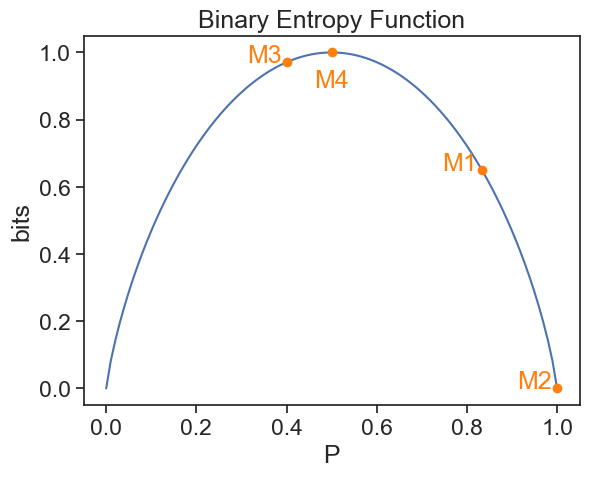

In [119]:
#| code-summary: "plot"
fig, ax = plt.subplots()
p = np.linspace(0, 1, 100)
eps = 1e-10
def entropy_H(p):
    return -p*np.log2(p+eps)-(1-p)*np.log2(1-p+eps)
ax.plot(p, entropy_H(p), label=r"$  H(p)$")

p_machine1 = 5/6
ax.plot([p_machine1], [entropy_H(p_machine1)], marker='o', ls='none', color='tab:orange')
ax.text(p_machine1-0.05, entropy_H(p_machine1), "M1", ha='center', color='tab:orange')

p_machine2 = 1.0
ax.plot([p_machine2], [entropy_H(p_machine2)], marker='o', ls='none', color='tab:orange')
ax.text(p_machine2-0.05, entropy_H(p_machine2), "M2", ha='center', color='tab:orange')

p_machine3 = 4/10
ax.plot([p_machine3], [entropy_H(p_machine3)], marker='o', ls='none', color='tab:orange')
ax.text(p_machine3-0.05, entropy_H(p_machine3), "M3", ha='center', color='tab:orange')

p_machine4 = 5/10
ax.plot([p_machine4], [entropy_H(p_machine4)], marker='o', ls='none', color='tab:orange')
ax.text(p_machine4, entropy_H(p_machine4)-0.05, "M4", ha='center', va='top', color='tab:orange')

ax.set_xlabel("P")
ax.set_ylabel("bits")
ax.set_title("Binary Entropy Function")

The expected information is zero for machine 2, which certainly produces only cats ($P=1$). The expected information is maximal for machine 4, which produces cats and dogs with equal probabilities ($P=1/2$).

In Equations (5) and (6), we didn't explicitly say what the base of the logarithm is. It doesn't matter, since changing the base only changes the units of information. In the example above, we use base 2 because we have a binary choice, and the units for entropy are called bits, suggested by JW Tukey, meaning *binary digits*.

## one last example

Consider the frequency of the letters in the Hebrew alphabet (there are 22 letters). The most common letter is "י", which appears with a frequency of about 11.06%. The least common letter is "ט", which appears with a frequency of about 1.24%. If we opened a book written in Hebrew to a random page, and picked a random letter on that page, what would be the expected information from that letter?

/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_99634/300921586.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(df['Letter'], rotation=0);
/var/folders/cn/m58l7p_j6j10_4c43j4pd8gw0000gq/T/ipykernel_99634/300921586.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout();


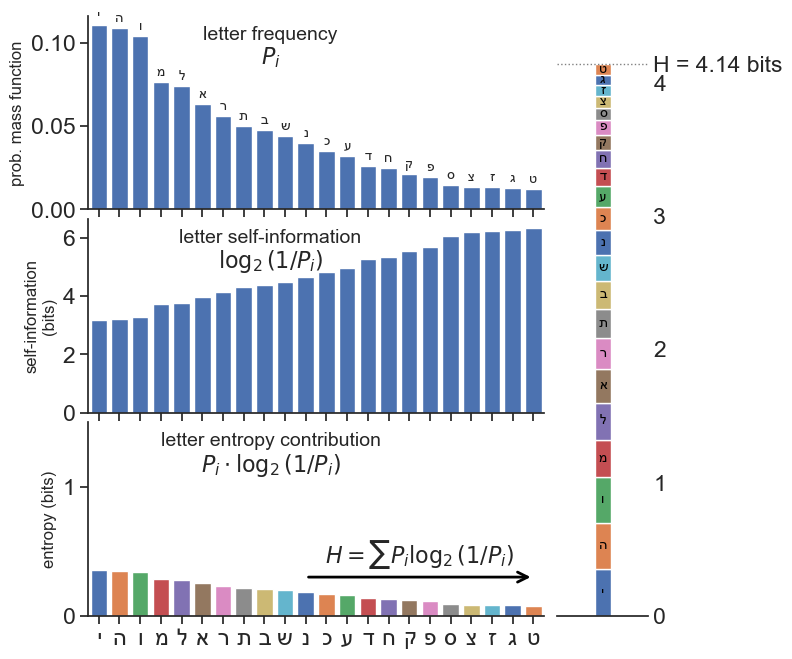

In [120]:
#| code-summary: "import data and plot"
df = pd.read_csv("../archive/data/letter_frequency_hebrew.csv", sep="\t")

fig= plt.figure(1, figsize=(8, 8))

gs = gridspec.GridSpec(3, 2, width_ratios=[1,0.2], height_ratios=[1,1,1])
gs.update(left=0.16, right=0.86,top=0.88, bottom=0.13, hspace=0.05, wspace=0.05)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0], sharex=ax0)
ax2 = plt.subplot(gs[2, 0], sharex=ax0)
ax3 = plt.subplot(gs[:, 1])

bar_width = 0.8

ax0.bar(df['Letter'], df['Frequency(%)']/100, width=bar_width)
for i, letter in enumerate(df['Letter']):
    ax0.text(i, df['Frequency(%)'][i]/100 + 0.002, letter, ha='center', va='bottom', fontsize=10)
ax0.set_xticklabels(df['Letter'], rotation=0);
ax0.set_ylabel('prob. mass function', fontsize=12)
ax0.set(xlim=(-0.5, len(df['Letter'])-0.5))
ax0.text(0.4, 0.95, 'letter frequency', transform=ax0.transAxes, ha='center', va='top', fontsize=14)
ax0.text(0.4, 0.85, r'$P_i$', transform=ax0.transAxes, ha='center', va='top', fontsize=16)

ax1.bar(df['Letter'], np.log2(1/(df['Frequency(%)']/100)), width=bar_width)
ax1.set_ylabel('self-information\n(bits)', fontsize=12)
ax1.text(0.4, 0.95, 'letter self-information', transform=ax1.transAxes, ha='center', va='top', fontsize=14)
ax1.text(0.4, 0.85, r'$\log_2(1/P_i)$', transform=ax1.transAxes, ha='center', va='top', fontsize=16)

Hi = (df['Frequency(%)']/100) * np.log2(1/(df['Frequency(%)']/100))
colors = sns.color_palette("deep", n_colors=len(df))
for i, (letter, h) in enumerate(zip(df['Letter'], Hi)):
    ax2.bar(letter, h, color=colors[i % len(colors)], width=bar_width)
ax2.set_ylabel('entropy (bits)', fontsize=12)
ax2.set(yticks=[0,1,2])
ax2.set_ylim(0,4.5/3)
ax2.text(0.4, 0.95, 'letter entropy contribution', transform=ax2.transAxes, ha='center', va='top', fontsize=14)
ax2.text(0.4, 0.85, r'$P_i\cdot\log_2(1/P_i)$', transform=ax2.transAxes, ha='center', va='top', fontsize=16)

# Annotate arrow from x=10 to x=20 on ax2
ax2.annotate(
    '', 
    xy=(len(df['Letter'])-1, 0.3), 
    xytext=(10, 0.3), 
    arrowprops=dict(arrowstyle='->', lw=2, color='black')
)
ax2.text(15.5, 0.35, r'$H=\sum P_i \log_2(1/P_i)$', ha='center', va='bottom', fontsize=16)
for spine in ['top', 'right']:
    ax0.spines[spine].set_visible(False)
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Plot stacked bars of the entropy contributions in ax3
bottom = 0
for i, H in enumerate(Hi):
    p = ax3.bar(0, H, width=bar_width, label=df['Letter'][i], bottom=bottom)
    ax3.text(0, bottom + H/2, f"{df['Letter'][i]}", ha='center', va='center', color='black', fontsize=10)
    bottom += H
ax3.set_xlim(-len(df['Letter'])/2*0.2, len(df['Letter'])/2*0.2)
ax3.set_ylim(0,4.5)
for spine in ['left', 'top', 'right']:
    ax3.spines[spine].set_visible(False)
ax3.yaxis.tick_right()

total_H = np.sum(Hi)
ax3.axhline(total_H, color='gray', linestyle=':', linewidth=1)
ax3.set(
    xticks=[],
    yticks=[0,1,2,3,4,total_H],
    yticklabels=[0,1,2,3,4, f'H = {total_H:.2f} bits']
)
ax3.tick_params(axis='y', which='major', length=0)

fig.tight_layout();

The expected information would be 4.14 bits. Because Hebrew has structure (like any other language), this is less than the maximum possible information. If all 22 letters were equally likely, the expected information would be:

\begin{align*}
H_\text{max} &= \sum_{i=1}^{22} \frac{1}{22} \log_2\left(\frac{1}{\frac{1}{22}}\right) \\
             &= \log_2(22) \\
             &\approx 4.46 \text{ bits}
\end{align*}



From this exercise, we learned that in the case that all outcomes are equally likely, the entropy is simply the logarithm of the number of possible outcomes. This is a useful fact to remember.